<a href="https://colab.research.google.com/github/AxelRamosGarcia/The-Anti-Microbial-resistance-prediction/blob/main/Anti_Microbial_resistance_Traditional_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Anti-Microbial resistance prediction

## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns

from google.colab import files

In [3]:
train_dataset_url = "https://raw.githubusercontent.com/AxelRamosGarcia/The-Anti-Microbial-resistance-prediction/refs/heads/main/DataSets/TrainingDataset.csv"
train_dataset = pd.read_csv(train_dataset_url, delimiter=",", encoding="utf-8")

test_dataset_url = "https://raw.githubusercontent.com/AxelRamosGarcia/The-Anti-Microbial-resistance-prediction/refs/heads/main/DataSets/TestingDataset.csv"
test_dataset = pd.read_csv(test_dataset_url, delimiter=",", encoding="utf-8")

url = "https://raw.githubusercontent.com/AxelRamosGarcia/The-Anti-Microbial-resistance-prediction/refs/heads/main/DataSets/downloaded_samples.txt"
response = requests.get(url)
lines = response.text.splitlines()  # Convert to a list
samples = lines[0].split(",")

# Figure download resolution
resolution_value = 300


In [4]:
# Select n random values that exist in both train_dataset['accession'] and the 'samples' list
n = 1000  # Change as needed

# Filter train_dataset['accession'] to get values that are in both train_dataset and samples
valid_values = train_dataset['accession'][train_dataset['accession'].isin(samples)]

# Select n random values from the valid values
train_random_values = valid_values.sample(n, random_state=42)

# Store values in a list
final_samples = train_random_values.tolist()

# Print values in the required format
for train_sample in final_samples:
    print(f"'{train_sample}'", end=" ")

'SRR5387156' 'SRR2449036' 'SRR5386843' 'SRR5386978' 'SRR2567189' 'SRR2567117' 'SRR4017843' 'SRR3665028' 'SRR3057131' 'SRR3665120' 'SRR5385400' 'SRR5385798' 'SRR3664786' 'SRR2567188' 'SRR3228534' 'SRR3664984' 'SRR3665223' 'SRR5385631' 'SRR3664991' 'SRR5386677' 'SRR2407639' 'SRR5386306' 'SRR5385824' 'SRR3664931' 'SRR4065676' 'SRR5387161' 'SRR5386304' 'SRR3321635' 'SRR5385814' 'SRR2567038' 'SRR5386684' 'SRR5386960' 'SRR5973360' 'SRR5973399' 'SRR3131221' 'SRR5385440' 'SRR4417577' 'SRR2567029' 'SRR5385945' 'SRR2567110' 'SRR3664673' 'SRR2566868' 'SRR4294848' 'SRR3665055' 'SRR3664932' 'SRR1661269' 'SRR2407722' 'SRR5385975' 'SRR5387315' 'SRR5386335' 'SRR1661224' 'SRR5385659' 'SRR2566862' 'SRR2449299' 'SRR5385998' 'SRR4044438' 'SRR5387261' 'SRR5386043' 'SRR3543499' 'SRR5387414' 'SRR3664666' 'GCA_004681485.1' 'SRR3664993' 'SRR3774324' 'SRR3196134' 'SRR5385914' 'SRR2566985' 'SRR2566982' 'SRR4245478' 'SRR3987124' 'SRR2407564' 'SRR3225231' 'SRR5385404' 'SRR3664753' 'SRR3995964' 'SRR5386353' 'SRR406

In [5]:
# Select n random values that exist in both train_dataset['accession'] and the 'samples' list
n = 100  # Change as needed

# Filter train_dataset['accession'] to get values that are in both train_dataset and samples
valid_values = test_dataset['accession'][test_dataset['accession'].isin(samples)]

# Select n random values from the valid values
test_random_values = valid_values.sample(n, random_state=42)

# Store values in a list
final_samples = train_random_values.tolist()

# Print values in the required format
for test_sample in final_samples:
    print(f"'{train_sample}'", end=" ")

'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625' 'SRR3664625'

## Exploratory Data Analysis

In [6]:
train_dataset.head()

,genus,species,accession,phenotype,antibiotic,measurement_sign,measurement_value,measurement_unit,laboratory_typing_method,laboratory_typing_platform,testing_standard,testing_standard_year,publication,isolation_source,isolation_country,collection_date
0,Acinetobacter,baumannii,GCA_002947415.1,Resistant,meropenem,>,8.0,mg/L,Broth dilution,NaN,CLSI,NaN,NaN,NaN,NaN,NaN
1,Acinetobacter,baumannii,GCA_002947845.1,Resistant,meropenem,>,8.0,mg/L,Broth dilution,NaN,CLSI,NaN,NaN,NaN,NaN,NaN
2,Acinetobacter,baumannii,GCA_002948925.1,Resistant,meropenem,>,8.0,mg/L,Broth dilution,NaN,CLSI,NaN,NaN,NaN,NaN,NaN
3,Acinetobacter,baumannii,GCA_002996805.1,Resistant,meropenem,>,8.0,mg/L,Broth dilution,NaN,CLSI,NaN,NaN,NaN,NaN,NaN
4,Acinetobacter,baumannii,GCA_003006035.1,Resistant,meropenem,>,8.0,mg/L,Broth dilution,NaN,CLSI,NaN,NaN,NaN,NaN,NaN


In [11]:
set(train_dataset["measurement_value"])

{0.002,
 0.004,
 0.008,
 0.012,
 0.015,
 0.016,
 0.023,
 0.03,
 0.032,
 0.06,
 0.063,
 0.094,
 0.12,
 0.125,
 0.25,
 0.38,
 0.5,
 1.0,
 2.0,
 4.0,
 6.0,
 8.0,
 11.0,
 12.0,
 16.0,
 32.0,
 64.0}

### Genus distirbution

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

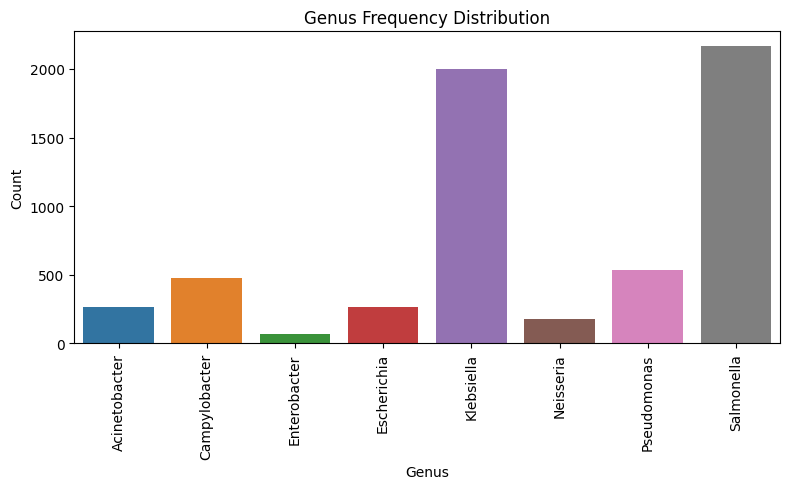

In [4]:
# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=train_dataset, x="genus", hue="genus")

# Labels and formatting
plt.title("Genus Frequency Distribution")
plt.xlabel("Genus")
plt.xticks(rotation=90)
plt.ylabel("Count")

# Prevent xticks from being cut off
plt.tight_layout()

# Save the figure
image_name = "Genus_frequency_distribution.png"
resolution_value = 300  # Ensure resolution is defined
plt.savefig(image_name, format="png", dpi=resolution_value)

# Download the image (for Google Colab users)
files.download(image_name)

### Species distribution

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

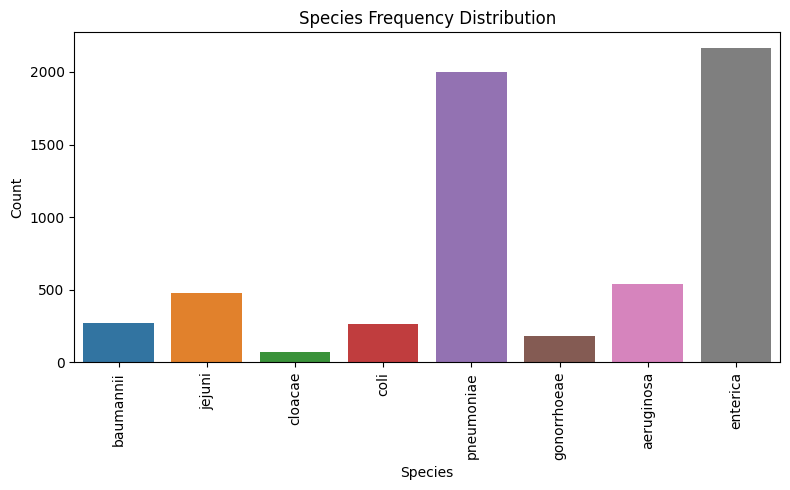

In [5]:
# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=train_dataset, x="species", hue="species")

# Labels and formatting
plt.title("Species Frequency Distribution")
plt.xlabel("Species")
plt.xticks(rotation=90)
plt.ylabel("Count")

# Prevent xticks from being cut off
plt.tight_layout()

# Save the figure
image_name = "Species_frequency_distribution.png"
resolution_value = 300  # Ensure resolution is defined
plt.savefig(image_name, format="png", dpi=resolution_value)

# Download the image (for Google Colab users)
files.download(image_name)

### Phenotype distribution

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

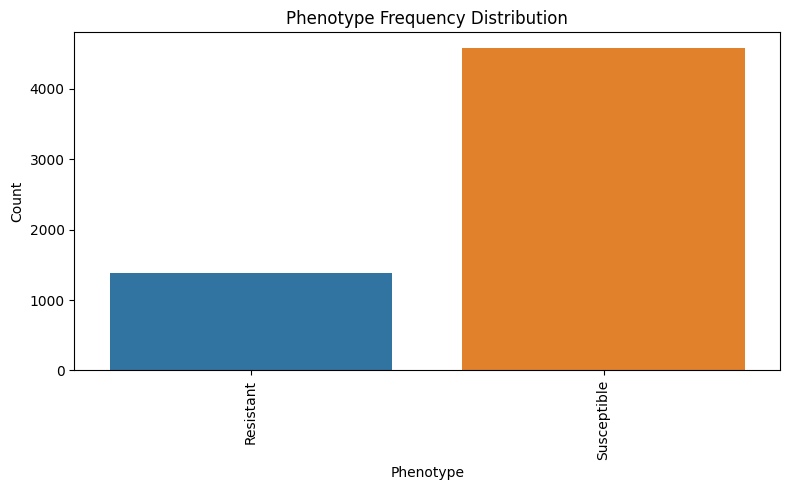

In [6]:
# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=train_dataset, x="phenotype", hue="phenotype")

# Labels and formatting
plt.title("Phenotype Frequency Distribution")
plt.xlabel("Phenotype")
plt.xticks(rotation=90)
plt.ylabel("Count")

# Prevent xticks from being cut off
plt.tight_layout()

# Save the figure
image_name = "Phenotype_frequency_distribution.png"
resolution_value = 300  # Ensure resolution is defined
plt.savefig(image_name, format="png", dpi=resolution_value)

# Download the image (for Google Colab users)
files.download(image_name)

## Traditional Machine Learning models

### Simulated data

In [ ]:
# Number of samples to select
n_training_samples = 1000
n_testing_samples = 100

# Filter valid accession values that exist in both datasets and the 'samples' list
training_valid_values = train_dataset[train_dataset['accession'].isin(samples)]
testing_valid_values = test_dataset[test_dataset['accession'].isin(samples)]

# Select n random values from valid training and testing sets
train_random_samples = training_valid_values.sample(n=n_training_samples, random_state=42)
test_random_samples = testing_valid_values.sample(n=n_testing_samples, random_state=42)

# Retrieve genus and species for selected samples
train_selected = train_random_samples[['accession', 'genus', 'species', 'antibiotic', 'measurement_value', 'phenotype']]
test_selected = test_random_samples[['accession', 'genus', 'species']]

# Simulated PCA K-mer features (3 principal components)
pca_kmer_train = np.random.rand(len(train_selected), 3)
pca_kmer_test = np.random.rand(len(test_selected), 3)

# Simulated AMR gene and SNP counts
amr_gene_count_train = np.random.randint(0, 10, len(train_selected))  # Assume 0-10 AMR genes
amr_gene_count_test = np.random.randint(0, 10, len(test_selected))

snp_count_train = np.random.randint(0, 100, len(train_selected))  # Assume 0-100 SNPs
snp_count_test = np.random.randint(0, 100, len(test_selected))

# Add these features to train dataset
train_selected["PCA_Kmer_1"] = pca_kmer_train[:, 0]
train_selected["PCA_Kmer_2"] = pca_kmer_train[:, 1]
train_selected["PCA_Kmer_3"] = pca_kmer_train[:, 2]
train_selected["AMR_Gene_Count"] = amr_gene_count_train
train_selected["SNP_Count"] = snp_count_train

# Add these features to test dataset
test_selected["PCA_Kmer_1"] = pca_kmer_test[:, 0]
test_selected["PCA_Kmer_2"] = pca_kmer_test[:, 1]
test_selected["PCA_Kmer_3"] = pca_kmer_test[:, 2]
test_selected["AMR_Gene_Count"] = amr_gene_count_test
test_selected["SNP_Count"] = snp_count_test

# Display results
print(train_selected.head())
print(test_selected.head())

### Phenotype prediction

Since phenotype is a binary classification problem (Resistant / suceptible), we will implement the following models:

- Logistic regression: Simple, interpretable, good baseline.
- Random Forest Classifier: Captures nonlinear patterns, handles feature importance.
- XGBoost Classifier: High-performance gradient boosting.
- Support Vector Machine (SVM) -Works well in high-dimensional spaces.
- K-Nearest Neighbors (KNN) - Simpl, non-parametric baseline.

Evaluations metrics
- Accuracy, Precision, Recall, F1-Score
- AUC-ROC Curve (To evaluate model discrimination)

### MIC Prediction

Since *measurement_value* is continuous, we will use regression models:
- Linear Regression: Simple, interpretable, baseline model.
- Random Forest Regressor: Nonlinear realtionships, feature importance.
- XGBoost Regressor: Powerful boosting model for structured data.
- Support Vector Regression (SVR): Kernel-basel regression.
- K-Nearest Neighbors (KNN) Regressor: Non-parametric, captures local patterns.

Evaluation metrics:
- Root Mean Squared Error (RMSE).
- Mean Absolute Error (MAE).
- R^{2} Score (Coefficeint of Determiantion)

In [ ]:
: